In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np


In [20]:
all_data = pd.read_csv("Life_Expectancy_Data.csv", header=0)
israel_data = all_data[all_data['Country'] == 'Israel']
israel_data

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,...,Polio,Total.expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness.10-19.years,thinness.5-9.years,Income.composition.of.resources,Schooling
1266,Israel,2015,Developing,82.5,58.0,0,NaN,0.000000,96.0,80,...,95.0,NaN,95.0,0.1,35729.37253,8381.0,1.2,1.1,0.898,16.0
1267,Israel,2014,Developing,82.2,6.0,1,2.62,4348.335310,97.0,6,...,95.0,7.81,95.0,0.1,37582.84624,82157.0,1.2,1.1,0.895,16.0
1268,Israel,2013,Developing,82.1,61.0,1,2.69,4279.895512,97.0,50,...,96.0,7.89,96.0,0.1,36393.66932,8595.0,1.2,1.1,0.891,15.9
1269,Israel,2012,Developing,81.8,6.0,1,2.78,3830.184587,97.0,211,...,94.0,7.73,94.0,0.1,32569.59683,7915.0,1.2,1.1,0.889,15.9
1270,Israel,2011,Developing,81.8,61.0,1,2.67,3793.161624,98.0,70,...,94.0,7.39,94.0,0.1,33657.15727,77658.0,1.2,1.1,0.883,15.8
1271,Israel,2010,Developing,81.7,61.0,1,2.63,409.410929,97.0,23,...,95.0,7.36,95.0,0.1,3661.99400,76236.0,1.2,1.1,0.878,15.7
1272,Israel,2009,Developing,81.5,63.0,1,2.55,508.664544,98.0,5,...,96.0,7.46,96.0,0.1,27795.87671,74856.0,1.2,1.1,0.876,15.6
1273,Israel,2008,Developing,81.0,65.0,1,2.47,471.553329,99.0,931,...,94.0,7.33,94.0,0.1,29657.44210,7388.0,1.1,1.1,0.877,15.8
1274,Israel,2007,Developing,84.0,68.0,1,2.33,4.345102,99.0,539,...,95.0,7.37,95.0,0.1,258.63700,7181.0,1.1,1.1,0.872,15.7
1275,Israel,2006,Developing,84.0,68.0,1,2.23,33.586207,96.0,9,...,94.0,7.38,95.0,0.1,2195.17690,7537.0,1.1,1.1,0.870,15.7


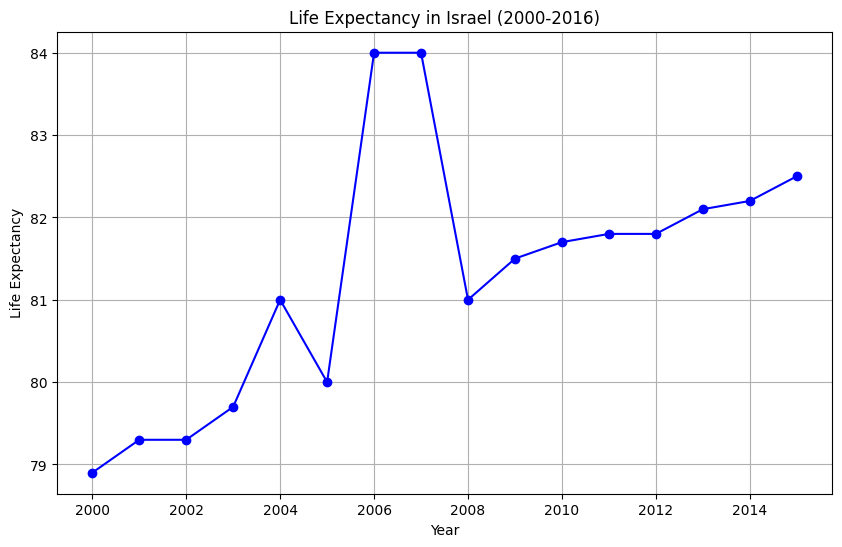

In [21]:
life_expectancy = israel_data['Life.expectancy']
year = israel_data['Year']
plt.figure(figsize=(10, 6))
plt.plot(year, life_expectancy, marker='o', linestyle='-', color='b')
plt.title('Life Expectancy in Israel (2000-2016)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

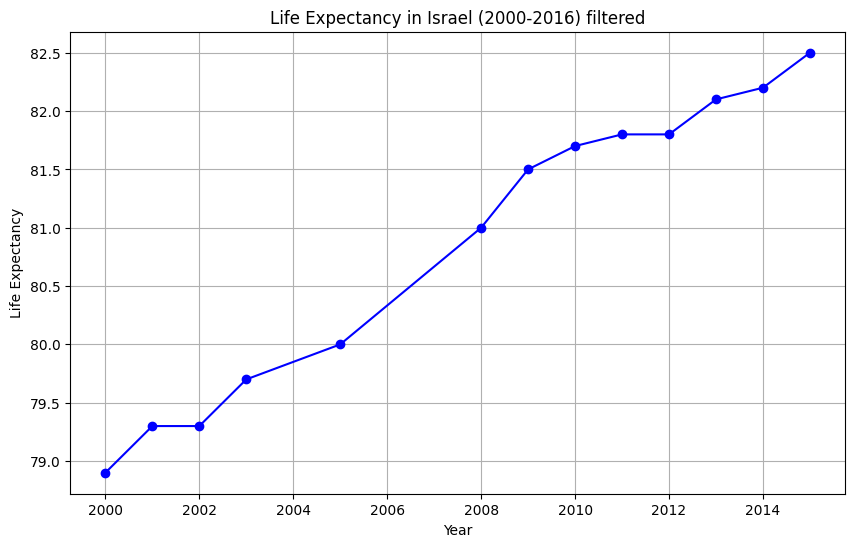

In [22]:
israel_data_filtered = israel_data[
    (israel_data['Life.expectancy'] < 84) & (israel_data['Year'] != 2004)]  # Remove outliers
life_expectancy_filtered = israel_data_filtered['Life.expectancy']
year_filtered = israel_data_filtered['Year']
plt.figure(figsize=(10, 6))
plt.plot(year_filtered, life_expectancy_filtered, marker='o', linestyle='-', color='b')
plt.title('Life Expectancy in Israel (2000-2016) filtered')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

In [23]:
# Linear model to predict Life.expectancy for the next two years
X = israel_data_filtered['Year']
y = israel_data_filtered['Life.expectancy']
X = sm.add_constant(X)  # adding a constant

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print the model summary
model_summary = model.summary()
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:        Life.expectancy   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     592.5
Date:                Sat, 06 Jul 2024   Prob (F-statistic):           6.44e-11
Time:                        14:57:22   Log-Likelihood:                 4.8869
No. Observations:                  13   AIC:                            -5.774
Df Residuals:                      11   BIC:                            -4.644
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -410.3591     20.183    -20.332      0.0

C:\Users\malia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)
